## **UC San Diego Data Science Casptone Project [Winter 2025]**

#### **Team Members**
- Catherine Back
- Yuancheng (Kaleo) Cao
- Aj Falak
- Kavya Sriram

### **Introduction**

### **Data Cleaning**

#### Get and Load Dataset

In [1]:
# Imports
import sys
import zipfile

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown, display
import pandas as pd
import seaborn as sns

In [2]:
import zipfile

zip_file_path = 'pretrial_release_data2023.zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    with zip_ref.open('pretrial_release_data2023.csv') as csv_file:
        pretrial_df = pd.read_csv(csv_file)

pretrial_df

,Internal_Case_ID,Gender,Race,Ethnicity,Age_at_Crime,Age_at_Arrest,Court_Name,Court_ORI,County_Name,District,...,prior_misd_cnt,pend_vfo,pend_nonvfo,pend_misd,supervision,rearrest,rearrest_date,rearrest_firearm,rearrest_date_firearm,arr_cycle_id
0,0x7D5A7A079A4D37CF1E45EC4,Male,Black,Non Hispanic,24,24,Kings Criminal Court,NY023033J,Kings,District 2,...,0.0,0.0,0.0,0.0,0.0,No Arrest,NaN,0.0,NaN,1441855.0
1,0x65DA7AE4C1F68EAD828F68B,Male,White,Hispanic,51,51,Queens Criminal Court,NY040033J,Queens,District 11,...,0.0,0.0,0.0,0.0,0.0,No Arrest,NaN,0.0,NaN,1135968.0
2,0x74775A9DB79BE9D2562A37B,Male,White,Non Hispanic,30,30,Schoharie County Court (M-B),NY047013J,Schoharie,District 3,...,0.0,0.0,0.0,0.0,0.0,No Arrest,NaN,0.0,NaN,190950.0
3,0xE05C798F936677645105A30,Male,Unknown,Unknown,24,24,Nassau District Court,NY029013J,Nassau,District 10N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0x44403907DC0611F6DD9BE0F,Male,White,Hispanic,29,29,New York Criminal Court,NY030033J,New York,District 1,...,1.0,0.0,0.0,0.0,0.0,No Arrest,NaN,0.0,NaN,905753.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285387,0x2BBED7AB218CF5642D07062,Male,Black,Non Hispanic,27,27,New York Criminal Court,NY030033J,New York,District 1,...,1.0,0.0,0.0,0.0,0.0,No Arrest,NaN,0.0,NaN,1448385.0
285388,0xB6A2649C599FC43E6FDE84A,Male,Other,Unknown,27,27,Nassau District Court,NY029013J,Nassau,District 10N,...,0.0,0.0,0.0,0.0,0.0,Misdemeanor,1/1/2024,0.0,NaN,1246052.0
285389,0xB4212660AC6DEC0827CDD85,Male,Unknown,Unknown,25,25,Nassau District Court,NY029013J,Nassau,District 10N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285390,0x1B30669744902CD3498DF0C,Male,Black,Non Hispanic,34,34,Schenectady City Court,NY046011J,Schenectady,District 4,...,0.0,0.0,0.0,0.0,1.0,Non-violent felony,10/1/2023,0.0,NaN,1243671.0


In [3]:
nan_percentages = pretrial_df.isna().mean() * 100
sorted_nan_percentages = nan_percentages.sort_values(ascending=False)
len(sorted_nan_percentages[sorted_nan_percentages > 1])

52

In [4]:
sorted_nan_percentages
col_list = sorted_nan_percentages[sorted_nan_percentages > 1].index.tolist()
col_list

['First_Unsecured_App_Bond',
 'Partially_Secured_App_Bond_Perc',
 'First_Partially_Secured_App_Bond',
 'First_Unsecured_Surety_Bond',
 'First_Secured_App_Bond',
 'rearrest_date_firearm',
 'First_Secured_Surety_Bond',
 'First_Bail_Set_Credit',
 'Top_Arraign_Attempt_Indicator',
 'Days_Arraign_Remand_First_Released',
 'Days_Arraign_Bail_Set_to_First_Posted',
 'Bail_Made_Indicator',
 'Num_of_Stayed_WO',
 'First_Bench_Warrant_Date',
 'Non_Stayed_WO',
 'First_Insurance_Company_Bail_Bond',
 'Partially_Secured_Surety_Bond_Perc',
 'First_Partially_Secured_Surety_Bond',
 'Days_Arraign_Bail_Set_to_First_Release',
 'UCMSLiveDate',
 'rearrest_date',
 'First_Bail_Set_Cash',
 'Most_Severe_Sentence',
 'Top_Conviction_Law',
 'Top_Conviction_Article_Section',
 'Top_Charge_at_Conviction',
 'Top_Charge_Severity_at_Conviction',
 'Top_Charge_Weight_at_Conviction',
 'Order_of_Protection',
 'Days_Arraign_to_Dispo',
 'Disposition_Date',
 'arr_cycle_id',
 'rearrest',
 'prior_vfo_cnt',
 'prior_nonvfo_cnt',
 'pen

In [5]:
pretrial_df = pretrial_df[pretrial_df['rearrest'].notna()]

In [6]:
pretrial_df['rearrest'].value_counts()

rearrest
No Arrest             205084
Misdemeanor            19842
Non-violent felony     14813
Violent felony          4982
Name: count, dtype: int64

In [7]:
pretrial_df.loc[:, 'reoffend'] = pretrial_df['rearrest'].apply(lambda x: 0 if x == 'No Arrest' else 1)

/var/folders/zl/dmpncrf92wg19vdg6q96y0n40000gn/T/ipykernel_40802/1792770735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pretrial_df.loc[:, 'reoffend'] = pretrial_df['rearrest'].apply(lambda x: 0 if x == 'No Arrest' else 1)


In [8]:
pretrial_df = pretrial_df.copy()
pretrial_df.loc[:, 'First_Arraign_Date'] = pd.to_datetime(pretrial_df['First_Arraign_Date'])

In [9]:
date_columns = [col for col in pretrial_df.columns if 'date' in col.lower()]
date_columns

['First_Arraign_Date',
 'First_Bench_Warrant_Date',
 'Disposition_Date',
 'UCMSLiveDate',
 'rearrest_date',
 'rearrest_date_firearm']

In [10]:
pretrial_df.loc[:, 'First_Arraign_Date'] = pd.to_datetime(pretrial_df['First_Arraign_Date']).dt.date

### Checking Unique Values in Each Column for Typos/Unique Missing Values/Errors etc.

In [11]:
#Converting Date Types
pretrial_df['First_Bench_Warrant_Date'] = pd.to_datetime(pretrial_df['First_Bench_Warrant_Date'], errors='coerce')
pretrial_df['Disposition_Date'] = pd.to_datetime(pretrial_df['Disposition_Date'], errors='coerce')
pretrial_df['UCMSLiveDate'] = pd.to_datetime(pretrial_df['UCMSLiveDate'], errors='coerce')
pretrial_df['rearrest_date_firearm'] = pd.to_datetime(pretrial_df['rearrest_date_firearm'], errors='coerce')
pretrial_df['rearrest_date'] = pd.to_datetime(pretrial_df['rearrest_date'], errors='coerce')


In [12]:
# Renaming Columns for Consistency
pretrial_df['Offense Year'].sort_values().unique()
pretrial_df = pretrial_df.rename(columns={"Offense Year": "Offense_Year"})
pretrial_df['Offense_Year'] = pretrial_df['Offense_Year'].fillna(0).astype(int)

pretrial_df['Arrest Year'].sort_values().unique()
pretrial_df = pretrial_df.rename(columns={"Arrest Year": "Arrest_Year"})
pretrial_df['Arrest_Year'] = pretrial_df['Arrest_Year'].fillna(0).astype(int)

pretrial_df = pretrial_df.rename(columns={"Arraign Charge Category": "Arraign_Charge_Category"})
pretrial_df = pretrial_df.rename(columns={"Release Decision at Arraign": "Release_Decision_at_Arraign"})

In [13]:
#Converting Types 
pretrial_df['App_Count_Arraign_to_Dispo_Released'] = pretrial_df['App_Count_Arraign_to_Dispo_Released'].astype(int)
pretrial_df['App_Count_Arraign_to_Dispo_Detained'] = pretrial_df['App_Count_Arraign_to_Dispo_Detained'].astype(int)
pretrial_df['App_Count_Arraign_to_Dispo_Total'] = pretrial_df['App_Count_Arraign_to_Dispo_Total'].astype(int)
pretrial_df['Def_Attended_Sched_Pretrials'] = pretrial_df['Def_Attended_Sched_Pretrials'].fillna(0).astype(int)
pretrial_df['Non_Stayed_WO'] = pretrial_df['Non_Stayed_WO'].fillna(0).astype(int)
pretrial_df['Num_of_Stayed_WO'] = pretrial_df['Num_of_Stayed_WO'].fillna(0).astype(int)
pretrial_df['Days_Arraign_Remand_First_Released'] = pretrial_df['Days_Arraign_Remand_First_Released'].fillna(0).astype(int)
pretrial_df['Days_Arraign_Bail_Set_to_First_Posted'] = pretrial_df['Days_Arraign_Bail_Set_to_First_Posted'].fillna(0).astype(int)
pretrial_df['Days_Arraign_Bail_Set_to_First_Release'] = pretrial_df['Days_Arraign_Bail_Set_to_First_Release'].fillna(0).astype(int)
pretrial_df['Days_Arraign_to_Dispo'] = pretrial_df['Days_Arraign_to_Dispo'].fillna(0).astype(int)
pretrial_df['prior_vfo_cnt'] = pretrial_df['prior_vfo_cnt'].astype(int)
pretrial_df['prior_nonvfo_cnt'] = pretrial_df['prior_nonvfo_cnt'].astype(int)
pretrial_df['prior_misd_cnt'] = pretrial_df['prior_misd_cnt'].astype(int)
pretrial_df['pend_vfo'] = pretrial_df['pend_vfo'].astype(int)
pretrial_df['pend_nonvfo'] = pretrial_df['pend_nonvfo'].astype(int)
pretrial_df['pend_misd'] = pretrial_df['pend_misd'].astype(int)
pretrial_df['supervision'] = pretrial_df['supervision'].astype(int)
pretrial_df['rearrest_firearm'] = pretrial_df['rearrest_firearm'].astype(int)

In [14]:
#Replacing Unique NaN values with NaN
pretrial_df['Top_Severity_at_Arraign'] = pretrial_df['Top_Severity_at_Arraign'].replace(" ", np.nan)
pretrial_df['Disposition_Type'] = pretrial_df['Disposition_Type'].replace(" ", np.nan)
pretrial_df['Disposition_Detail'] = pretrial_df['Disposition_Detail'].replace(" ", np.nan)
pretrial_df['Dismissal_Reason'] = pretrial_df['Dismissal_Reason'].replace(" ", np.nan)
pretrial_df['Top_Conviction_Attempt_Indicator'] = pretrial_df['Top_Conviction_Attempt_Indicator'].replace(" ", np.nan)
pretrial_df['Top_Arrest_Attempt_Indicator'] = pretrial_df['Top_Arrest_Attempt_Indicator'].replace(" ", np.nan)


In [15]:
#Drop Columns with 90% NaN Values
print(pretrial_df.shape)
pretrial_df.dropna(axis=1, thresh=0.9 * len(pretrial_df), inplace=True)
print(pretrial_df.shape)

(244721, 113)
(244721, 81)


### **Exploratory Data Analysis (EDA)**

#### Data Understanding

In [16]:
summary_stats = pretrial_df.describe(include='all')
summary_stats

,Internal_Case_ID,Gender,Race,Ethnicity,Age_at_Crime,Age_at_Arrest,Court_Name,Court_ORI,County_Name,District,...,prior_nonvfo_cnt,prior_misd_cnt,pend_vfo,pend_nonvfo,pend_misd,supervision,rearrest,rearrest_firearm,arr_cycle_id,reoffend
count,244721,244721,244721,244721,244721.000000,244721.000000,244721,244721,244721,244721,...,244721.000000,244721.000000,244721.000000,244721.000000,244721.000000,244721.000000,244721,244721.000000,2.378710e+05,244721.000000
unique,244721,3,6,3,NaN,NaN,163,163,62,14,...,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN
top,0x7D5A7A079A4D37CF1E45EC4,Male,Black,Non Hispanic,NaN,NaN,Kings Criminal Court,NY023033J,Kings,District 2,...,NaN,NaN,NaN,NaN,NaN,NaN,No Arrest,NaN,NaN,NaN
freq,1,195813,121197,158936,NaN,NaN,40117,40117,46127,46127,...,NaN,NaN,NaN,NaN,NaN,NaN,205084,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,35.097940,34.455498,NaN,NaN,NaN,NaN,...,0.474034,1.774993,0.077537,0.163251,0.217587,0.065581,NaN,0.004111,1.090061e+06,0.161968
std,NaN,NaN,NaN,NaN,12.467152,13.384345,NaN,NaN,NaN,NaN,...,0.967195,2.971150,0.267443,0.369595,0.412606,0.247548,NaN,0.063984,3.216342e+05,0.368422
min,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.611500e+04,0.000000
25%,NaN,NaN,NaN,NaN,26.000000,26.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,9.226275e+05,0.000000
50%,NaN,NaN,NaN,NaN,33.000000,33.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.125994e+06,0.000000
75%,NaN,NaN,NaN,NaN,43.000000,42.000000,NaN,NaN,NaN,NaN,...,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.328811e+06,0.000000


In [17]:
missing_values = pretrial_df.isnull().sum().to_dict()
missing_values

{'Internal_Case_ID': 0,
 'Gender': 0,
 'Race': 0,
 'Ethnicity': 0,
 'Age_at_Crime': 0,
 'Age_at_Arrest': 0,
 'Court_Name': 0,
 'Court_ORI': 0,
 'County_Name': 0,
 'District': 0,
 'Region': 0,
 'Court_Type': 0,
 'Judge_Name': 0,
 'Offense_Month': 1653,
 'Offense_Year': 0,
 'Arrest_Month': 6501,
 'Arrest_Year': 0,
 'Top_Arrest_Law': 5524,
 'Top_Arrest_Article_Section': 5524,
 'Top_Charge_at_Arrest': 5524,
 'Top_Charge_Severity_at_Arrest': 5524,
 'Top_Charge_Weight_at_Arrest': 5524,
 'Top_Charge_at_Arrest_Violent_Felony_Ind': 0,
 'Case_Type': 0,
 'First_Arraign_Date': 0,
 'Top_Arraign_Law': 1501,
 'Top_Arraign_Article_Section': 1501,
 'Top_Charge_at_Arraign': 1501,
 'Top_Severity_at_Arraign': 1934,
 'Top_Charge_Weight_at_Arraign': 1501,
 'Top_Charge_at_Arraign_Violent_Felony_Ind': 0,
 'Hate_Crime_Ind': 0,
 'Arraign_Charge_Category': 0,
 'Representation_Type': 2811,
 'App_Count_Arraign_to_Dispo_Released': 0,
 'App_Count_Arraign_to_Dispo_Detained': 0,
 'App_Count_Arraign_to_Dispo_Total': 0,

1. Several columns have few missing data, meaning they are mostly complete but still have some missing values that need attention. {`Offense_Month`: 1653, `Arrest_Month`: 6501, `Top_Arrest_Article_Section`: 5524, `Top_Charge_at_Arrest`: 5524, `Top_Charge_Severity_at_Arrest`: 5524, `Top_Charge_Weight_at_Arrest`: 5524, `Top_Arraign_Law`: 1501, `Top_Arraign_Article_Section`: 1501, `Top_Charge_at_Arraign`: 1501,  `Top_Charge_Weight_at_Arraign`: 1501, `Representation_Type`: 2811}
2. Several columns with significant missing values, which is concerning because these columns likely contain important information related to the case outcomes, bail conditions, or sentencing details. {`First_Bail_Set_Cash`: 200656, `First_Bench_Warrant_Date`: 218556, `Days_Arraign_Remand_First_Released`: 236156}
3. Some columns have very little data, with over 90% of the values missing. {`First_Unsecured_App_Bond`, `Partially_Secured_App_Bond_Perc`,`First_Partially_Secured_App_Bond`,`First_Unsecured_Surety_Bond`,`First_Secured_App_Bond`, `rearrest_date_firearm`, `First_Secured_Surety_Bond`, `First_Bail_Set_Credit`, `Top_Arraign_Attempt_Indicator`, `Days_Arraign_Remand_First_Released`, `Days_Arraign_Bail_Set_to_First_Posted`, `Bail_Made_Indicator`, `Num_of_Stayed_WO`}


#### Data Visualization

In [18]:
demographics = ['Race', 'Ethnicity', 'Gender']

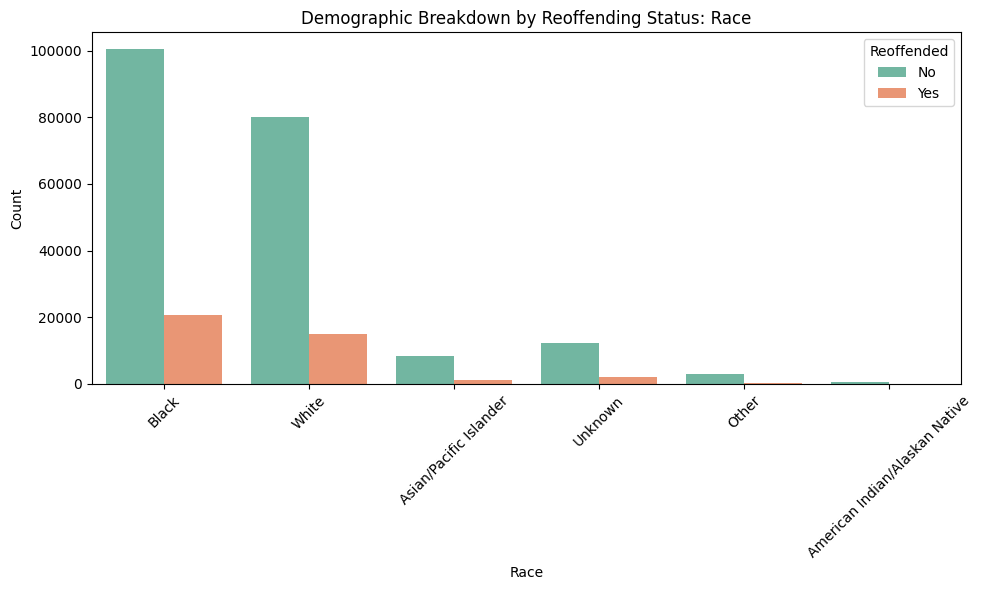

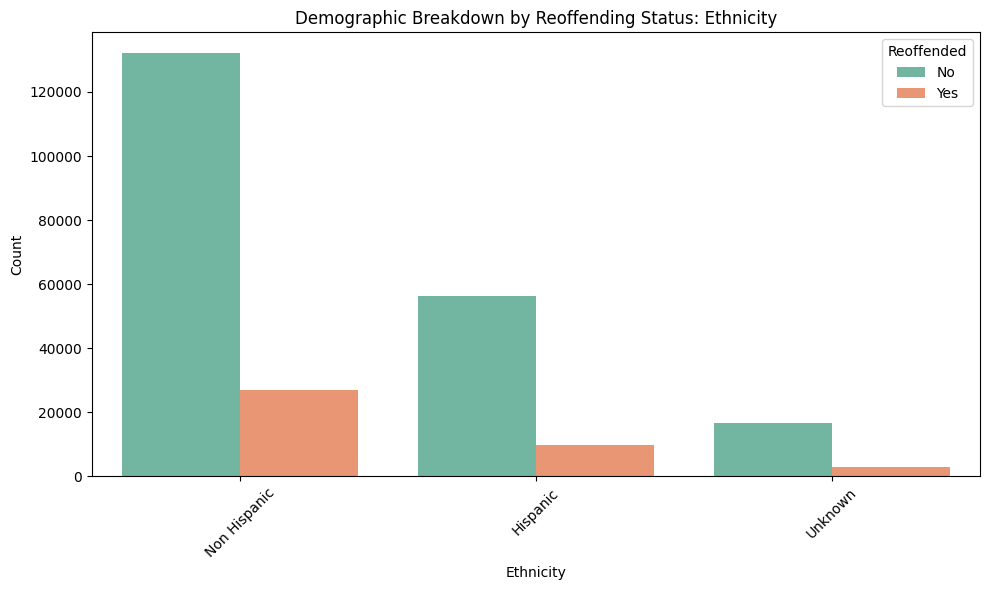

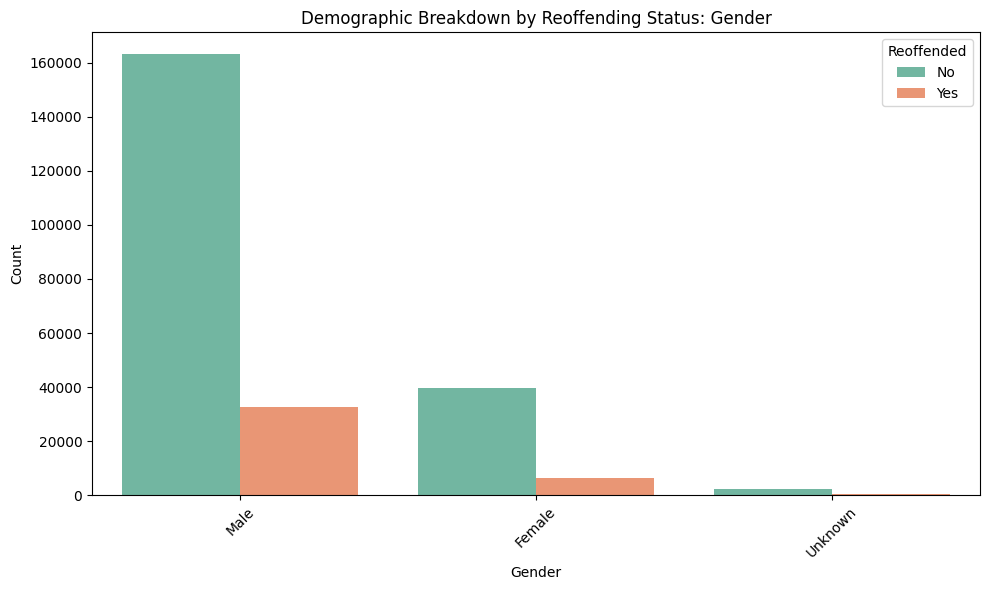

In [19]:
for demo in demographics:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=demo, hue='reoffend', data=pretrial_df, palette='Set2')
    plt.title(f'Demographic Breakdown by Reoffending Status: {demo.capitalize()}')
    plt.xlabel(demo.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Reoffended', labels=['No', 'Yes'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [20]:
pretrial_df['Days_Arraign_to_Dispo'].sort_values()

142473      0
138518      0
138512      0
138502      0
138496      0
         ... 
219952    416
3425      416
88408     418
200769    418
116396    420
Name: Days_Arraign_to_Dispo, Length: 244721, dtype: int64

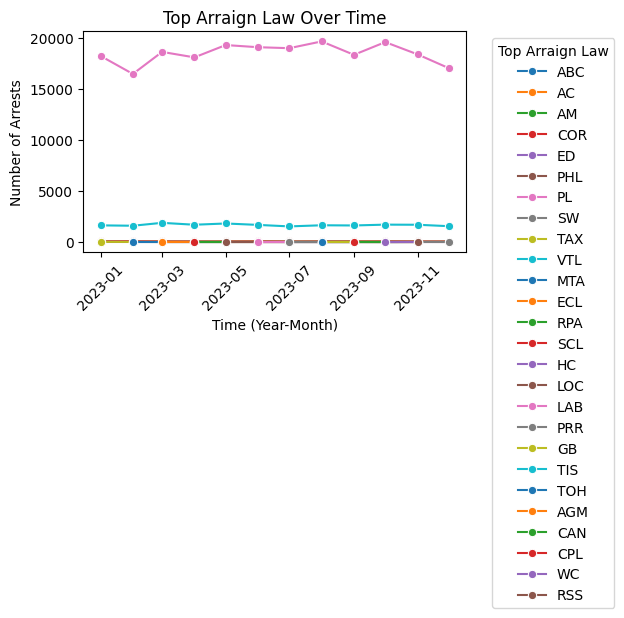

In [21]:
pretrial_df['First_Arraign_Date'] = pd.to_datetime(pretrial_df['First_Arraign_Date'])
arrest_trend = pretrial_df.groupby(['First_Arraign_Date', 'Top_Arraign_Law']).size().reset_index(name='count')
sns.lineplot(data=arrest_trend, x='First_Arraign_Date', y='count', hue='Top_Arraign_Law', marker='o', palette='tab10')
plt.title('Top Arraign Law Over Time')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.legend(title='Top Arraign Law', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [22]:
sum(pretrial_df['Age_at_Arrest'] != pretrial_df['Age_at_Crime'])

23555

Text(0, 0.5, 'Count')

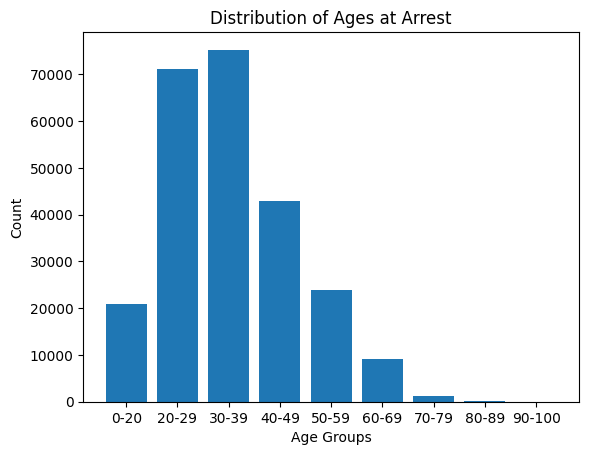

In [23]:
# pretrial_df['Age_at_Arrest'].max() # max is 95
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
counts, bin_edges = np.histogram(pretrial_df['Age_at_Arrest'], bins=bins)
labels = ['0-20', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

plt.bar(labels, counts)
plt.title('Distribution of Ages at Arrest')
plt.xlabel('Age Groups')
plt.ylabel('Count')


In [24]:
for race in pretrial_df['Race'].unique():
    print(race)

Black
White
Asian/Pacific Islander
Unknown
Other
American Indian/Alaskan Native


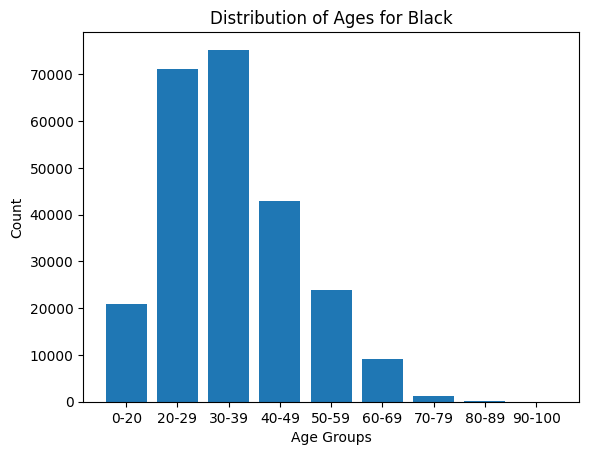

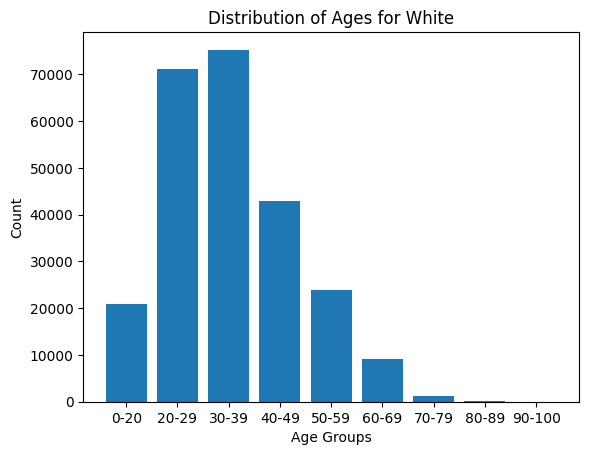

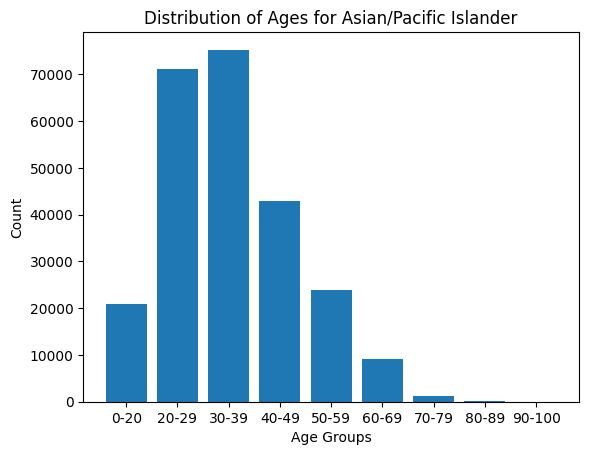

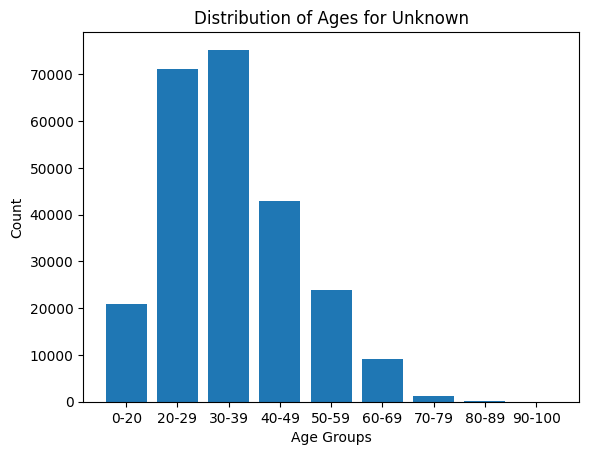

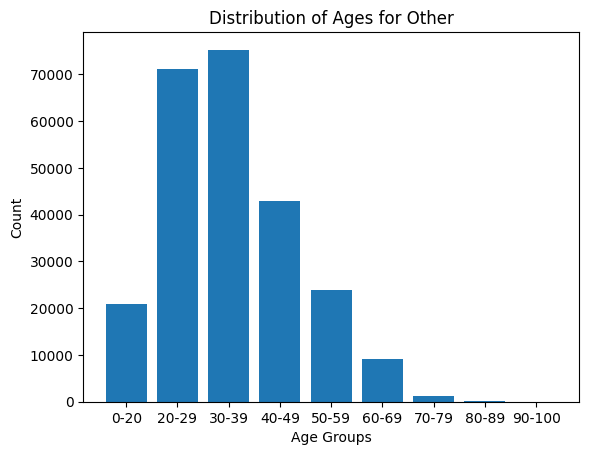

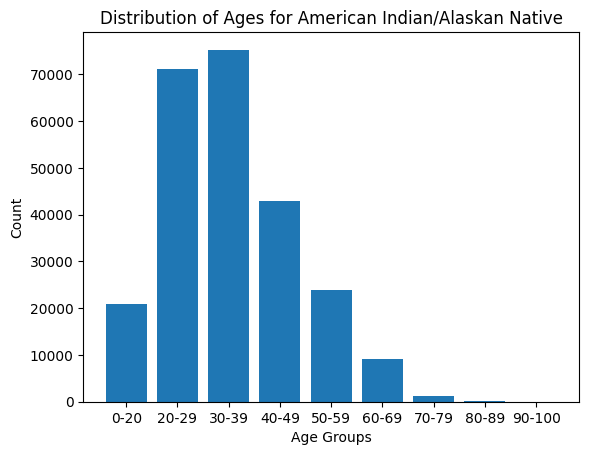

In [25]:
for race in pretrial_df['Race'].unique():
    bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    counts, bin_edges = np.histogram(pretrial_df['Age_at_Arrest'], bins=bins)
    plt.bar(labels, counts)
    plt.title(f'Distribution of Ages for ' + race)
    plt.xlabel('Age Groups')
    plt.ylabel('Count')
    plt.show()



In [26]:
pretrial_df['Age_at_Arrest'].isnull().sum()

0

In [27]:
for race in pretrial_df['Race']:
    pretrial_df['Bail_Set_and_Posted_at_Arraign']

#### Feature Engineering

In [28]:
#arraignment to disposition
pretrial_df['Days_Arraign_to_Dispo'].describe()

count    244721.00000
mean         58.94486
std          70.84927
min           0.00000
25%           1.00000
50%          33.00000
75%          97.00000
max         420.00000
Name: Days_Arraign_to_Dispo, dtype: float64

In [29]:
very_fast = pretrial_df['Days_Arraign_to_Dispo'].min()
fast = pretrial_df['Days_Arraign_to_Dispo'].quantile(0.25)
moderate = pretrial_df['Days_Arraign_to_Dispo'].median()
slow = pretrial_df['Days_Arraign_to_Dispo'].quantile(0.75)
very_slow = pretrial_df['Days_Arraign_to_Dispo'].max()
bins = [very_fast, fast, moderate, slow, very_slow]

bin_labels = ['Very Fast Resolution', 'Fast Resolution', 'Moderate Resolution', 'Slow Resolution']
pretrial_df['Resolution_Category'] = pd.cut(pretrial_df['Days_Arraign_to_Dispo'], bins=bins, labels=bin_labels, right=False)
pretrial_df['Resolution_Category'].value_counts()

Resolution_Category
Fast Resolution         69611
Slow Resolution         63646
Moderate Resolution     59173
Very Fast Resolution    52290
Name: count, dtype: int64

In [30]:
pretrial_df['Has_Prior_Offense'] = ((pretrial_df['prior_vfo_cnt'] > 0) |
                                    (pretrial_df['prior_nonvfo_cnt'] > 0) |
                                    (pretrial_df['prior_misd_cnt'] > 0)).astype(int)
pretrial_df['Has_Prior_Offense'].value_counts()

Has_Prior_Offense
0    126123
1    118598
Name: count, dtype: int64

### Bail

Accepted Bail

In [31]:
bail_given = pretrial_df[pretrial_df['Bail_Set_and_Posted_at_Arraign'] == 'Y']
bail_per_race = bail_given.groupby('Race').size()
bail_per_race

Race
American Indian/Alaskan Native      11
Asian/Pacific Islander             134
Black                             2242
Other                               64
Unknown                            131
White                             1339
dtype: int64

In [32]:
bail_offered = pretrial_df[
    (pretrial_df['Bail_Set_and_Posted_at_Arraign'] == 'Y') |
    (pretrial_df['Bail_Set_and_Not_Posted_at_Arraign'] == 'Y')
]

bail_offered_per_race = bail_offered.groupby('Race').size() / pretrial_df.groupby('Race').size()
bail_offered_per_race

Race
American Indian/Alaskan Native    0.122195
Asian/Pacific Islander            0.096788
Black                             0.179369
Other                             0.142238
Unknown                           0.134681
White                             0.147007
dtype: float64

In [33]:
bail_requested = pretrial_df[
    (pretrial_df['Bail_Set_and_Posted_at_Arraign'] == 'Y') |
    (pretrial_df['Bail_Set_and_Not_Posted_at_Arraign'] == 'Y')
]

total_bail_requests_by_race = bail_requested.groupby('Race').size()
accepted_bail_requests_by_race = bail_requested[bail_requested['Bail_Set_and_Posted_at_Arraign'] == 'Y'].groupby('Race').size()
bail_acceptance_rate = (accepted_bail_requests_by_race / total_bail_requests_by_race) * 100

bail_info_df = pd.DataFrame({
    'Total Bail Request': total_bail_requests_by_race,
    'Accepted Bail Requests': accepted_bail_requests_by_race,
    'Acceptance Rate (%)': bail_acceptance_rate}).reset_index()

bail_info_df

,Race,Total Bail Request,Accepted Bail Requests,Acceptance Rate (%)
0,American Indian/Alaskan Native,98,11,11.224490
1,Asian/Pacific Islander,922,134,14.533623
2,Black,21739,2242,10.313262
3,Other,492,64,13.008130
4,Unknown,1946,131,6.731757
5,White,14008,1339,9.558824


## One Hot Encoding

In [34]:
#One Hot Encode Categorical Variables
df_encoded = pd.get_dummies(pretrial_df, columns=['Gender', 'Race', 'Ethnicity', 'District', 'Region', 'Court_Type', 
                                                  'Offense_Month', 'Offense_Year', 'Arrest_Month', 'Arrest_Year',
                                                  'Top_Arrest_Article_Section', 'Top_Charge_Severity_at_Arrest', 
                                                  'Top_Charge_Weight_at_Arrest', 'Top_Charge_at_Arrest_Violent_Felony_Ind',
                                                  'Case_Type', 'Top_Arraign_Law', 'Top_Severity_at_Arraign', 'Top_Charge_Weight_at_Arraign',
                                                  'Top_Charge_at_Arraign_Violent_Felony_Ind', 'Hate_Crime_Ind', 'Arraign_Charge_Category',
                                                  'Representation_Type', 'Remanded_to_Jail_at_Arraign', 'ROR_at_Arraign', 
                                                  'Bail_Set_and_Posted_at_Arraign', 'Bail_Set_and_Not_Posted_at_Arraign', 'NMR_at_Arraign',
                                                  'Release_Decision_at_Arraign', 'Pretrial_Supervision_at_Arraign', 'Contact_Pretrial_Service_Agency',
                                                  'Electronic_Monitoring', 'Travel_Restrictions', 'Passport_Surrender', 'No_Firearms_or_Weapons',
                                                  'Maintain_Employment', 'Maintain_Housing', 'Maintain_School', 'Placement_in_Mandatory_Program', 
                                                  'Removal_to_Hospital', 'Obey_Order_of_Protection', 'Obey_Court_Conditions-Family_Offense',
                                                  'Other_NMR', 'Warrant_Ordered_btw_Arraign_and_Dispo', 'DAT_WO_WS_Prior_to_Arraign', 
                                                  'Docket_Status', 'Top_Charge_at_Conviction_Violent_Felony_Ind', 'pend_vfo',
                                                  'pend_nonvfo', 'pend_misd', 'supervision', 'rearrest','Has_Prior_Offense'])
df_encoded.head()

,Internal_Case_ID,Age_at_Crime,Age_at_Arrest,Court_Name,Court_ORI,County_Name,Judge_Name,Top_Arrest_Law,Top_Charge_at_Arrest,First_Arraign_Date,...,pend_misd_0,pend_misd_1,supervision_0,supervision_1,rearrest_Misdemeanor,rearrest_No Arrest,rearrest_Non-violent felony,rearrest_Violent felony,Has_Prior_Offense_0,Has_Prior_Offense_1
0,0x7D5A7A079A4D37CF1E45EC4,24,24,Kings Criminal Court,NY023033J,Kings,"Hayes Torres, Patrick",PL,PL 165.40 AM Crim Possession Stoln Prop-5th,2023-09-01,...,True,False,True,False,False,True,False,False,True,False
1,0x65DA7AE4C1F68EAD828F68B,51,51,Queens Criminal Court,NY040033J,Queens,"Freire, Diego A.",PL,PL 145.00 04 AM Crim Mis 4:Prevnt Emergncy Cal,2023-04-01,...,True,False,True,False,False,True,False,False,True,False
2,0x74775A9DB79BE9D2562A37B,30,30,Schoharie County Court (M-B),NY047013J,Schoharie,"Mcallister, Ryan",PL,PL 120.03 01 EF Vehicular Assault 2nd: Injury,2023-09-01,...,True,False,True,False,False,True,False,False,True,False
4,0x44403907DC0611F6DD9BE0F,29,29,New York Criminal Court,NY030033J,New York,"Weiner, Jay L.",PL,PL 120.14 01 AM Menacing-2nd:Weapon,2023-02-01,...,True,False,True,False,False,True,False,False,False,True
5,0xE67EB1E8C111209F555FC8E,30,30,Kings Criminal Court,NY023033J,Kings,"Haniff, Simiyon S.",PL,PL 165.15 03 AM Intent/Fraud Obt Trans W/O Pay,2023-12-01,...,True,False,True,False,False,True,False,False,False,True


In [ ]:
# Special Columns

#How do we want to handle these values?
# df_encoded['Court_Name'].unique()
# df_encoded['Court_ORI'].unique()
# df_encoded['County_Name'].unique()

# df_encoded['Judge_Name'].unique()

# df_encoded['Top_Arrest_Law'].unique()
# df_encoded['Top_Arrest_Article_Section'].unique() #Needs further looking
# df_encoded['Top_Charge_at_Arrest'].unique()
# df_encoded['Top_Arraign_Article_Section'].unique()
# df_encoded['Top_Charge_at_Arraign'].unique() #9
# df_encoded['arr_cycle_id'].unique()

In [36]:
df_encoded.head()

,Internal_Case_ID,Age_at_Crime,Age_at_Arrest,Court_Name,Court_ORI,County_Name,Judge_Name,Top_Arrest_Law,Top_Charge_at_Arrest,First_Arraign_Date,...,pend_misd_0,pend_misd_1,supervision_0,supervision_1,rearrest_Misdemeanor,rearrest_No Arrest,rearrest_Non-violent felony,rearrest_Violent felony,Has_Prior_Offense_0,Has_Prior_Offense_1
0,0x7D5A7A079A4D37CF1E45EC4,24,24,Kings Criminal Court,NY023033J,Kings,"Hayes Torres, Patrick",PL,PL 165.40 AM Crim Possession Stoln Prop-5th,2023-09-01,...,True,False,True,False,False,True,False,False,True,False
1,0x65DA7AE4C1F68EAD828F68B,51,51,Queens Criminal Court,NY040033J,Queens,"Freire, Diego A.",PL,PL 145.00 04 AM Crim Mis 4:Prevnt Emergncy Cal,2023-04-01,...,True,False,True,False,False,True,False,False,True,False
2,0x74775A9DB79BE9D2562A37B,30,30,Schoharie County Court (M-B),NY047013J,Schoharie,"Mcallister, Ryan",PL,PL 120.03 01 EF Vehicular Assault 2nd: Injury,2023-09-01,...,True,False,True,False,False,True,False,False,True,False
4,0x44403907DC0611F6DD9BE0F,29,29,New York Criminal Court,NY030033J,New York,"Weiner, Jay L.",PL,PL 120.14 01 AM Menacing-2nd:Weapon,2023-02-01,...,True,False,True,False,False,True,False,False,False,True
5,0xE67EB1E8C111209F555FC8E,30,30,Kings Criminal Court,NY023033J,Kings,"Haniff, Simiyon S.",PL,PL 165.15 03 AM Intent/Fraud Obt Trans W/O Pay,2023-12-01,...,True,False,True,False,False,True,False,False,False,True


### **Model Development without Debiasing**

### **Bias Mitigation**

### **Conclusion & Discussion**